<a href="https://colab.research.google.com/github/fabuloudy/diploma/blob/main/detection_generated_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Обработка датасета

In [1]:
from google.colab import files
uploaded = files.upload()


Saving data_texts.csv to data_texts.csv


In [ ]:

!pip install simpletransformers

In [10]:
import pandas as pd
import random
df = pd.read_csv("data_texts.csv")
df['Data_generate'] = df['Data_generate'].apply(lambda x: x.replace('\xa0', ' ').replace('\n',' '))
df['Original_data'] = df['Original_data'].apply(lambda x: ' '.join(x.split()[:random.randint(50,70)]))




In [11]:
df.to_csv("dataset.csv", sep=';', encoding='utf-8')

In [ ]:
df.columns.values

array(['Title', 'Topic', 'Data_generate', 'Original_data'], dtype=object)

In [ ]:
label_gen = [0 for i in range(2000)]
label_orig  = [1 for i in range(2000)]

In [ ]:
import random
generated = df['Data_generate']
df['Original_data'] = df['Original_data'].apply(lambda x: x.split()[:random.randint(50,70)])
origin = df['Original_data']
res = list(generated)
origin = [' '.join(seq) for seq in origin]



data_gen = zip(list(generated),label_gen)
data_orig = zip(list(origin),label_orig)
train_data = list(data_gen) + list(data_orig)

  
random.shuffle(train_data)



In [ ]:
print(res[100:200])

Empty DataFrame
Columns: [text, labels]
Index: []


In [ ]:
print(len(train_data))

4000


In [ ]:
correct = 0
all = 0
index_list = list()
for i,(text,label) in enumerate(train_data):
  index = text.find('...')
  if index != -1:
    all += 1
    index_list.append(i)
    if label == 0:
      correct += 1
    else:
      print(text)

print(correct/all)
print(correct)

In [ ]:
print(index_list)
print(len(train_data))
shab_train_data = list()
for i,data in enumerate(train_data):
  if i not in index_list:
    shab_train_data.append(data)
print(len(shab_train_data))


[10, 13, 32, 41, 86, 92, 97, 106, 115, 118, 120, 138, 156, 157, 162, 164, 165, 166, 176, 178, 181, 182, 193, 195, 197, 223, 224, 231, 234, 235, 237, 257, 258, 268, 270, 273, 274, 277, 278, 279, 284, 300, 309, 310, 322, 323, 358, 363, 366, 371, 393, 394, 421, 452, 458, 461, 480, 486, 500, 510, 513, 514, 518, 522, 528, 529, 531, 534, 535, 540, 544, 551, 553, 559, 561, 580, 584, 587, 613, 619, 624, 633, 653, 659, 661, 662, 672, 675, 685, 686, 687, 696, 712, 713, 715, 722, 748, 750, 765, 770, 771, 784, 799, 804, 817, 818, 824, 827, 829, 830, 842, 843, 850, 851, 864, 868, 872, 888, 893, 900, 911, 914, 918, 920, 936, 944, 947, 948, 949, 956, 957, 958, 959, 966, 967, 969, 977, 996, 998, 1000, 1001, 1009, 1010, 1019, 1020, 1023, 1024, 1028, 1037, 1038, 1039, 1050, 1051, 1052, 1054, 1056, 1062, 1065, 1079, 1105, 1112, 1116, 1117, 1125, 1130, 1139, 1142, 1148, 1150, 1154, 1156, 1160, 1164, 1166, 1176, 1179, 1180, 1205, 1211, 1214, 1227, 1228, 1236, 1257, 1258, 1268, 1273, 1279, 1282, 1288, 1294,

In [ ]:

train_data = shab_train_data[:]

In [ ]:
!pip install pymorphy2
import pymorphy2 as morphy
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
nltk.download('punkt')
nltk.download('stopwords')
from sklearn import preprocessing
import collections
import re
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [ ]:
parser = morphy.MorphAnalyzer()
stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на'])
pos_gen = list()
tense_gen = list()
pos_orig = list()
tense_orig = list()
for gen in generated:
    for word in gen:
      p = parser.parse(word)[0]
      pos_gen.append(p.tag.POS)
      tense_gen.append(p.tag.tense)
for orig in origin:
    for word in orig:
      p = parser.parse(word)[0]
      pos_orig.append(p.tag.POS)
      tense_orig.append(p.tag.tense)



In [ ]:
count_gen_words = 0
count_orig_words =0 
for gen in generated:
  for word in gen:
    count_gen_words += 1
for orig in origin:
  for word in orig:
    count_orig_words += 1

def print_stat(cnt,count):
  print('NOUNS: {}'.format(cnt['NOUN']/count))
  print('VERBS: {}'.format(cnt['VERB']/count))
  print('PREP: {}'.format(cnt['PREP']/count))
  print('ADJ: {}'.format(cnt['ADJ']/count))

        


In [ ]:
import collections


cnt = collections.Counter()
for word in pos_gen:
  cnt[word] += 1
print(cnt)
print_stat(cnt,count_gen_words)
cnt = collections.Counter()
for word in tense_gen:
  cnt[word] += 1
#print_stat(cnt,count_gen_words)
cnt = collections.Counter()
for word in pos_orig:
  cnt[word] += 1
print_stat(cnt,count_orig_words)
cnt = collections.Counter()
for word in tense_orig:
  cnt[word] += 1
#print_stat(cnt,count_orig_words)
#for i in range(50):
#  print('generate: {} original: {}'.format(a[i],b[i]))

Counter({None: 184504, 'NOUN': 148699, 'PREP': 144666, 'CONJ': 88716, 'ADVB': 46171, 'VERB': 42670, 'PRCL': 13522, 'NPRO': 8763, 'INTJ': 1679})
NOUNS: 0.2188713404671838
VERBS: 0.06280634098235181
PREP: 0.21293513298694416
ADJ: 0.0
NOUNS: 0.2257607603033903
VERBS: 0.06565618292571485
PREP: 0.22000811299349401
ADJ: 0.0


In [ ]:
print(cnt)

Counter({None: 836672, 'pres': 58850})


In [ ]:
import collections
texts_gen = [t.split() for t in tok]
a = collections.Counter([word for t in texts_gen for word in set(t)]).most_common()[:100]
texts_orig = [t.split() for t in eni]
b = collections.Counter([word for t in texts_orig for word in set(t)]).most_common()[:100]
for i in range(50):
  print('generate: {} original: {}'.format(a[i],b[i]))

generate: ('в', 1783) original: ('в', 1926)
generate: ('и', 1369) original: ('на', 1460)
generate: ('на', 1284) original: ('и', 1260)
generate: ('с', 947) original: ('по', 1080)
generate: ('по', 719) original: ('о', 1066)
generate: ('быть', 700) original: ('с', 1052)
generate: ('не', 621) original: ('сообщать', 1016)
generate: ('это', 506) original: ('это', 981)
generate: ('из', 469) original: ('быть', 802)
generate: ('о', 468) original: ('что', 782)
generate: ('он', 458) original: ('который', 720)
generate: ('как', 437) original: ('как', 546)
generate: ('который', 426) original: ('не', 544)
generate: ('за', 410) original: ('он', 542)
generate: ('а', 362) original: ('из', 535)
generate: ('россия', 338) original: ('год', 504)
generate: ('для', 307) original: ('россия', 383)
generate: ('они', 298) original: ('к', 350)
generate: ('что', 273) original: ('от', 342)
generate: ('год', 269) original: ('они', 327)
generate: ('свой', 253) original: ('для', 322)
generate: ('от', 242) original: ('

[59, 56, 46, 49, 53, 60, 59, 10, 60, 56, 75, 58, 35, 62, 70, 67, 52, 58, 66, 58, 38, 51, 7, 50, 65, 41, 60, 55, 22, 48, 17, 52, 69, 67, 8, 63, 64, 71, 44, 29, 48, 52, 51, 22, 32, 56, 8, 57, 66, 64, 27, 44, 59, 27, 32, 57, 53, 72, 65, 66, 10, 55, 69, 56, 56, 52, 41, 49, 61, 58, 57, 35, 13, 50, 12, 59, 11, 26, 61, 39, 17, 52, 42, 66, 56, 34, 57, 69, 52, 64, 41, 13, 7, 57, 69, 51, 11, 30, 50, 23, 52, 82, 30, 28, 24, 52, 21, 67, 55, 69, 65, 57, 54, 65, 65, 64, 23, 59, 51, 9, 70, 58, 62, 68, 50, 31, 58, 40, 70, 54, 57, 36, 7, 52, 74, 11, 12, 55, 37, 74, 35, 45, 61, 70, 55, 59, 49, 66, 54, 41, 62, 57, 58, 57, 23, 68, 38, 50, 63, 25, 66, 56, 58, 57, 16, 66, 69, 59, 14, 64, 61, 33, 62, 64, 57, 66, 69, 70, 55, 65, 50, 63, 61, 9, 27, 67, 73, 42, 37, 53, 26, 73, 24, 58, 65, 24, 72, 59, 58, 61, 16, 50, 66, 58, 41, 20, 62, 74, 65, 57, 58, 11, 20, 64, 30, 19, 46, 27, 66, 20, 49, 24, 48, 64, 64, 7, 13, 53, 63, 76, 75, 42, 9, 63, 50, 69, 52, 52, 32, 12, 56, 61, 36, 65, 46, 55, 37, 58, 47, 23, 50, 53, 

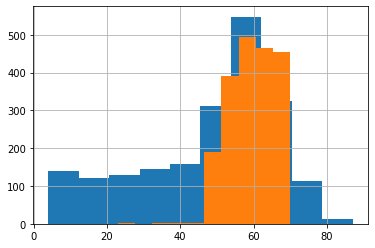

In [ ]:
import matplotlib.pyplot as plt
red = [len(text.split()) for text in generated]
print(red)
green = [len(text.split()) for text in origin]
print(green)
index = [i for i in range(1072)]
pd.Series(red).hist()
pd.Series(green).hist()


Text(0, 0.5, 'Количество текстов')

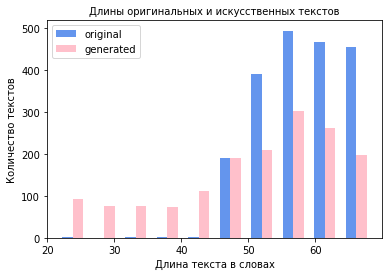

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn
#seaborn.set(style='ticks')


np.random.seed(0)
df = pandas.DataFrame(np.random.normal(size=(37,2)), columns=['original', 'generated'])
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(green)
b_heights, b_bins = np.histogram(red, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3
plt.title("Длины оригинальных и искусственных текстов", fontsize=10)
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue',label = 'original')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='pink', label = 'generated')
ax.legend()
ax.set_xlabel('Длина текста в словах')
ax.set_ylabel('Количество текстов')
#seaborn.despine(ax=ax, offset=10)

In [ ]:
 res = pd.DataFrame(train_data[100:200],columns = ["text","labels"])
 
with pd.ExcelWriter ('test.xlsx') as writer:
                res['text'].to_excel(writer, sheet_name = 'sheet1',engine='xlsxwriter')
                res['labels'].to_excel(writer, sheet_name = 'sheet2',engine='xlsxwriter')

In [ ]:

def split_to_lists(data):
    texts = list()
    labels = list()
    for (txt,lb) in data:
        texts.append(txt)
        labels.append(lb)
    return texts,labels


In [ ]:
!pip install pymorphy2
import pymorphy2 as morphy
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
nltk.download('punkt')
nltk.download('stopwords')
from sklearn import preprocessing
import collections
import re
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


parser = morphy.MorphAnalyzer()
stop_words = stopwords.words('russian')
#stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на'])

def preprocess(text : str) -> str:
    tokens = nltk.word_tokenize(str(text).lower(), language = "russian")
    tokens = [token for token in tokens if not token.startswith('http')]
    punctuation = r"~`@#$%^&*()_+=-;:,./\|<>!№$^&*-{}"
    russian = "йцукенгшщзхъэждлорпавыфячсмитьбю"
   # tokens = [i for i in tokens if ( i not in stop_words )]
    tokens = [i.replace("«", "").replace("»", "").replace("”", "") for i in tokens]
    tokens = [token for token in tokens if token not in punctuation]
    tokens = [token for token in tokens if any([x in russian for x in token])]
    # tokens = [token for token in tokens if langdetect.detect(token) == "ru"]  
    tokens = [parser.parse(token)[0].normal_form for token in tokens]
    return ' '.join(tokens)

def tokenize(data):
    tokenized = list()
    for text in data:
        tokenized.append(preprocess(text))
    return tokenized

     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 8.2MB 28.5MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data,labels = split_to_lists(train_data)
#

In [ ]:

tokenized = tokenize(data)
#print(tokenized)

In [ ]:
print(tokenized[:5])

['армия спасение пожертвовать платиновый монета стоимость доллар выпустить август это один тысяча шестьсот пятьдесят восемь доллар сша копейка серебро платина качество основа клеймо производитель этот монетёнок выпустить кстати август первый выпуклый монетка надпись объявить запуск луна', 'группа втб снизить ставка ипотека процент годовой среда июнь сообщать тасс ссылка заявление финансовый организация общий снижение ставка жилищный кредит составить процентный пункт готовый недвижимость процентный пункт новостройка рамка совместный программа партнёр банк ставка составлять процент годовой сказать материал втб ранее июнь банк россия сообщить средний ставка', 'штат колорадо лавина сбросить шоссе несколько автомобиль это смочь добечь очевидец результат лавина снестись гора выжить выясниться утро возвратить джибути рандомный улица общий площадь тысяча квадратный км однокомнатный жилой комплекс оказаться слишком сообразительный человек беда ехать место свой спасение восток', 'учёный сша чили

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(tokenized,labels,test_size=0.3,random_state=42)

In [ ]:

print(test_X)

['пиратский партия открыть доступ запретить сайт', 'госдума одобрить разделение стабфонд надвое направить часть развитие российский фонд это позволить направить деньга пенсионный также социалький образовательный пенсионный подробный это позволить-таки пенсионный рефорс пройти дума ход рассмотрение законопроект изменение отдельный положение бюльбюхнеровский классификация российский федерация основа данный документ разработать база действовать бюстгальтерур федеральный классифи', 'вьетнамский суд приговорить учитель канада четыре год заключение развращение малолетний бомж четверг январь сообщать обвинить сексуальный отношение четыре бездомный мальчик который познакомиться центр ханой период конец год середина 2015-го рассказать издание представитель суд пояснить истечение тюремный срок преступник депортировать установить следствие вадим скотт бендерман приглашать жертва домой предлагать доллар совершение половой акт обвинительный заключение говориться действие бендерман причинить вред фи

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import random
from sklearn.naive_bayes import GaussianNB
#train_X,train_Y,test_X,test_Y

tfidf = TfidfVectorizer()
t_train_X = tfidf.fit_transform(train_X)
t_test_X = tfidf.transform(test_X)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
train_X_w = cvec.fit_transform(train_X)
test_X_w = cvec.transform(test_X)

cv_ngram_2 = CountVectorizer(analyzer='word', ngram_range=(4, 4))
train_X_2 = cv_ngram_2.fit_transform(train_X)
test_X_2 = cv_ngram_2.transform(test_X)

cv_ngram_3 = CountVectorizer(analyzer='word', ngram_range=(3, 3))
train_X_3 = cv_ngram_3.fit_transform(train_X)
test_X_3 = cv_ngram_3.transform(test_X)

##Метод Наинвый Байес

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(t_train_X.toarray(), train_Y)
Y_pred=model_naive_bayes.predict(t_test_X.toarray())
print(classification_report(Y_pred,test_Y))

              precision    recall  f1-score   support

           0       0.39      0.57      0.46       414
           1       0.70      0.53      0.60       786

    accuracy                           0.54      1200
   macro avg       0.54      0.55      0.53      1200
weighted avg       0.59      0.54      0.55      1200



In [ ]:
#cv words
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(train_X_w.toarray(), train_Y)
Y_pred=model_naive_bayes.predict(test_X_w.toarray())
print(classification_report(Y_pred,test_Y))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51       465
           1       0.68      0.55      0.61       735

    accuracy                           0.56      1200
   macro avg       0.57      0.57      0.56      1200
weighted avg       0.59      0.56      0.57      1200



In [ ]:
#ngrams 4
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(train_X_2.toarray(), train_Y)
Y_pred=model_naive_bayes.predict(test_X_2.toarray())
print(classification_report(Y_pred,test_Y))

              precision    recall  f1-score   support

           0       0.87      0.64      0.73       826
           1       0.49      0.79      0.61       374

    accuracy                           0.68      1200
   macro avg       0.68      0.71      0.67      1200
weighted avg       0.75      0.68      0.69      1200



In [ ]:
#ngrams 3
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(train_X_3.toarray(), train_Y)
Y_pred=model_naive_bayes.predict(test_X_3.toarray())
print(classification_report(Y_pred,test_Y))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       589
           1       0.74      0.72      0.73       611

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



## Метод SVM

In [ ]:
from sklearn import svm

support_vector_model = svm.SVC()
support_vector_model.fit(t_train_X.toarray(), train_Y)
Y_pred_svm=support_vector_model.predict(t_test_X.toarray())
print(classification_report(Y_pred_svm,test_Y))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       568
           1       0.91      0.85      0.88       632

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.87      1200
weighted avg       0.88      0.88      0.88      1200



In [ ]:
#cv words
support_vector_model = svm.SVC()
support_vector_model.fit(train_X_w.toarray(), train_Y)
Y_pred_svm=support_vector_model.predict(test_X_w.toarray())
print(classification_report(Y_pred_svm,test_Y))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       660
           1       0.82      0.90      0.86       540

    accuracy                           0.86      1200
   macro avg       0.86      0.87      0.86      1200
weighted avg       0.87      0.86      0.86      1200



In [ ]:
from sklearn import svm
#ngrams 4
support_vector_model = svm.SVC()
support_vector_model.fit(train_X_2.toarray(), train_Y)
Y_pred_svm=support_vector_model.predict(test_X_2.toarray())
print(classification_report(Y_pred_svm,test_Y))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1200
           1       0.00      0.00      0.00         0

    accuracy                           0.51      1200
   macro avg       0.50      0.25      0.34      1200
weighted avg       1.00      0.51      0.67      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import svm
#ngrams 3
support_vector_model = svm.SVC()
support_vector_model.fit(train_X_3.toarray(), train_Y)
Y_pred_svm=support_vector_model.predict(test_X_3.toarray())
print(classification_report(Y_pred_svm,test_Y))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1200
           1       0.00      0.00      0.00         0

    accuracy                           0.51      1200
   macro avg       0.50      0.25      0.34      1200
weighted avg       1.00      0.51      0.67      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Дерево решений

In [ ]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(t_train_X.toarray(), train_Y)
Y_pred_DT=model_decision_tree.predict(t_test_X.toarray())
print(classification_report(Y_pred_DT,test_Y))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       689
           1       0.70      0.81      0.75       511

    accuracy                           0.77      1200
   macro avg       0.77      0.78      0.77      1200
weighted avg       0.78      0.77      0.77      1200



In [ ]:
#cv words
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(train_X_w.toarray(), train_Y)
Y_pred_DT=model_decision_tree.predict(test_X_w.toarray())
print(classification_report(Y_pred_DT,test_Y))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       600
           1       0.82      0.81      0.81       600

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



In [ ]:
#ngram 4
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(train_X_2.toarray(), train_Y)
Y_pred_DT=model_decision_tree.predict(test_X_2.toarray())
print(classification_report(Y_pred_DT,test_Y))

              precision    recall  f1-score   support

           0       0.98      0.59      0.73      1015
           1       0.29      0.94      0.44       185

    accuracy                           0.64      1200
   macro avg       0.64      0.76      0.59      1200
weighted avg       0.87      0.64      0.69      1200



In [ ]:
#ngrams 3
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(train_X_3.toarray(), train_Y)
Y_pred_DT=model_decision_tree.predict(test_X_3.toarray())
print(classification_report(Y_pred_DT,test_Y))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       789
           1       0.64      0.93      0.76       411

    accuracy                           0.80      1200
   macro avg       0.80      0.83      0.80      1200
weighted avg       0.85      0.80      0.81      1200



## Ближайшие соседи

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


train_f1=[]
test_f1=[]
Pos_c=[3,5,9,15,21,25,31,33,51,61,71,101,141,171,201]

for c in Pos_c:
      model_KNN=KNeighborsClassifier(n_neighbors=c, algorithm='kd_tree')
      model_KNN.fit(t_train_X.toarray(), train_Y)
      Y_pred_KNN=model_KNN.predict(t_train_X.toarray())
      train_f1.append(accuracy_score(Y_pred_KNN,train_Y))
      Y_pred_KNN=model_KNN.predict(t_test_X.toarray())
      test_f1.append(f1_score(Y_pred_KNN,test_Y))
      print("done",c)
      print(f1_score(Y_pred_KNN,test_Y))
   
plt.plot(Pos_c,test_f1,color='red')
plt.plot(Pos_c,train_f1,color='green')
plt.show()

done 3
0.6087649402390437
done 5
0.6751389992057188
done 9
0.7300850734725446
done 15
0.7751343054489639
done 21
0.79023646071701
done 25
0.8024502297090352
done 31
0.8137931034482758
done 33
0.8140243902439024
done 51
0.8268497330282227
done 61
0.8279569892473118
done 71
0.8260536398467433


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

model_KNN=KNeighborsClassifier(n_neighbors=25, algorithm='kd_tree')
model_KNN.fit(t_train_X.toarray(), train_Y)
Y_pred_KNN=model_KNN.predict(t_test_X.toarray())
print(classification_report(Y_pred_KNN,test_Y))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       510
           1       0.88      0.74      0.81       690

    accuracy                           0.79      1200
   macro avg       0.80      0.80      0.79      1200
weighted avg       0.81      0.79      0.80      1200



In [ ]:
#cv words
model_KNN=KNeighborsClassifier(n_neighbors=25, algorithm='kd_tree')
model_KNN.fit(train_X_w.toarray(), train_Y)
Y_pred_KNN=model_KNN.predict(test_X_w.toarray())
print(classification_report(Y_pred_KNN,test_Y))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1200
           1       0.00      0.00      0.00         0

    accuracy                           0.52      1200
   macro avg       0.50      0.26      0.34      1200
weighted avg       1.00      0.52      0.68      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ngram 4
model_KNN=KNeighborsClassifier(n_neighbors=25, algorithm='kd_tree')
model_KNN.fit(train_X_2.toarray(), train_Y)
Y_pred_KNN=model_KNN.predict(test_X_2.toarray())
print(classification_report(Y_pred_KNN,test_Y))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1200
           1       0.00      0.00      0.00         0

    accuracy                           0.52      1200
   macro avg       0.50      0.26      0.34      1200
weighted avg       1.00      0.52      0.68      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#ngram 3
model_KNN=KNeighborsClassifier(n_neighbors=25, algorithm='kd_tree')
model_KNN.fit(train_X_3.toarray(), train_Y)
Y_pred_KNN=model_KNN.predict(test_X_3.toarray())
print(classification_report(Y_pred_KNN,test_Y))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1200
           1       0.00      0.00      0.00         0

    accuracy                           0.52      1200
   macro avg       0.50      0.26      0.34      1200
weighted avg       1.00      0.52      0.68      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Классификатор на основе языковой модели

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.3,random_state=42)

In [ ]:
!pip install transformers
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer, RobertaForSequenceClassification


In [ ]:
!pip install simpletransformers


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def f1_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

model_args = {
    'fp16': True,
    'train_batch_size': 16,
    'eval_batch_size': 16,
    'num_train_epochs': 4,
    'learning_rate': 4e-5,
    'process_count': 10,

    "do_lower_case": True,
    'overwrite_output_dir': True,
    'reprocess_input_data': True,
    'evaluate_during_training': True
}

model = ClassificationModel(
    "roberta", "blinoff/roberta-base-russian-v0",num_labels=None, weight=None, args=model_args, use_cuda=True
)



In [ ]:
data,labels = split_to_lists(train_data)
train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.3,random_state=42)
train = list(zip(train_X,train_Y))
train_df = pd.DataFrame(train)
train_df.columns = ["text","labels"]

test = list(zip(test_X,test_Y))
test_df = pd.DataFrame(test)
test_df.columns = ["text", "labels"]
d = model.train_model(train_df,eval_df=test_df,
                  accuracy=accuracy_score,
                  precision=precision_score,
                  recall=recall_score,
                  f1=f1_score,
                  f1_macro=f1_macro)

  0%|          | 0/2800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [ ]:
d

In [ ]:

correct = 0
all = 0
index_list = list()
for i,(text,label) in enumerate(test):
  index = text.find('...')
  if index != -1:
    all += 1
    index_list.append(i)
    if label == 0:
      correct += 1
    else:
      print(text)

print(correct/all)
print('{} out of {}'.format(correct,all))

Донецкая народная республика отправляет на Украину бесплатно 300 тонн угля. Состав из пяти вагонов прибудет в Харьковскую область, передает агентство «Новороссия». Как уточнил представитель ДНР Эдуард Басурин, изначально была договоренность, что Киев оплатит этот уголь. «Это жест доброй воли от нашего руководителя Захарченко Александра Владимировича. (...) Граждане не должны страдать
На Центральной площади города Токмак Запорожской области Украины демонтирован памятник писателю Тарасу Шевченко. Об этом в субботу, 6 февраля, сообщается на сайте телеканала Hromadske.tv. По словам депутата городского совета Вадима Лукаша, соответствующее решение принял мэр. «Нам сказали (...), решение принято аппаратом. По факту — единолично городским головой Игорем Котелевским», — отметил депутат. На этой же площади находится памятник Ленину, решение о сносе которого должно рассматриваться в феврале.
В американском издании The New York Times обвинили Киев в «объявлении войны журналистике». Так озаглавлен

In [ ]:

shab_test_data = list()
for i,data in enumerate(test):
  if i not in index_list:
    shab_test_data.append(data)
print(len(shab_test_data))
test_df = pd.DataFrame(shab_test_data)
test_df.columns = ["text", "labels"]

1015


In [ ]:
test = list(zip(test_X,test_Y))
test_df = pd.DataFrame(test)
test_df.columns = ["text", "labels"]

In [ ]:


result, model_outputs, wrong_predictions = model.eval_model(test_df,
                                                            accuracy=accuracy_score,
                                                            precision=precision_score,
                                                            recall=recall_score,
                                                            f1=f1_score,
                                                            f1_macro=f1_macro)

  0%|          | 0/1200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
print(result['accuracy'])

0.9516666666666667


In [ ]:
print(result)

{'mcc': 0.9040854484205638, 'tp': 577, 'tn': 565, 'fp': 41, 'fn': 17, 'auroc': 0.9908018579635742, 'auprc': 0.989906081352151, 'accuracy': 0.9516666666666667, 'precision': 0.9336569579288025, 'recall': 0.9713804713804713, 'f1': 0.9521452145214521, 'f1_macro': 0.9516618328499516, 'eval_loss': 0.2749554046726553}
